# PROCESO DE CADENA DE MARKOV CON TIEMPO DISCRETO

Este proceso describe los cambios de estado del sistema, camibanod con cierta probabilidad, siendo independiente del estado anterior del sistema.

Para un proceso de dos estados, la pmatriz de probabilidad que determina la transicion se puede escribir como:

$$P=\left[\begin{matrix}
p_{11} & 1-p_{11}\\
1-p_{22} & p_{22}\end{matrix}\right]$$

En caso de generalizar para $n$ estados:
$$P=\left[\begin{matrix}
p_{11} & \dots & p_{1n}\\
\vdots &\ddots &\vdots\\
p_{n1} & \dots &p_{nn}\end{matrix}\right]$$

Esta matriz es tal que la suma de cada fila es igual a $1$, cada indice de fila indica el estado de la fuente en un tiempo $t$, mientras que las columnas indican el destino en $t+1$.

La probabilidad de transicion puede ser condicional o no condicional; La distribuciond e probabilidad indica cuan probable es encontrar el sistema en uno u otro estado, esto se nombra como $\pi _{t}(\delta _{t})$ y se define por:
$$\pi_{t}=[P(x_{t}=+1),P(x_{t}=-1)]$$
considerando para el caso de dos estados.

La suma de todos los elementos de $\pi_{t}=1$. Tomando un valor de $\pi_{t}$ inicial, esto es $\pi_{0}$, a $t$ pasos, la probabilidad varia como:
$$\pi_{t}=\pi_{0}P^{t}$$

de aqui que \textit{La distribucion de probabilidad de un proceso de markov de variable aleatoria evoluciona con el tiempo.}


## Ejercicio:

Sea el stock de una empresa llamada ACME que incrementa o diminuye de acuerdo con que:


1. El precio de cierre actual comparado con ela nterior es mayor o menor dado algun porcentaje de puntos.
2. Dada una secuencia de 3 dias, puede subir el precio con probabilidad $P_{11}$ si el primer dia en comparacion con el segundo cerro en alza; de lo contrario cierra con probabilidad $1-P_{11}$.
3.  Del mismo modo para el cierre con probabilidad $P_{22}$, y $1-P_{22}$.

Toamdo algunos datos se tiene entonces una matriz de transicion:
$$P=\left[\begin{matrix}
0.6 & 0.25\\
0.75 & 0.25\end{matrix}\right]$$

Usando el siguiente codigo se obtiene entocnes la distribucion no condicional del proceso:

[[0.5        0.5       ]
 [0.64875    0.35125   ]
 [0.6526875  0.3473125 ]
 [0.65209688 0.34790312]
 [0.65218547 0.34781453]
 [0.65217218 0.34782782]
 [0.65217417 0.34782583]
 [0.65217387 0.34782613]
 [0.65217392 0.34782608]
 [0.65217391 0.34782609]
 [0.65217391 0.34782609]]


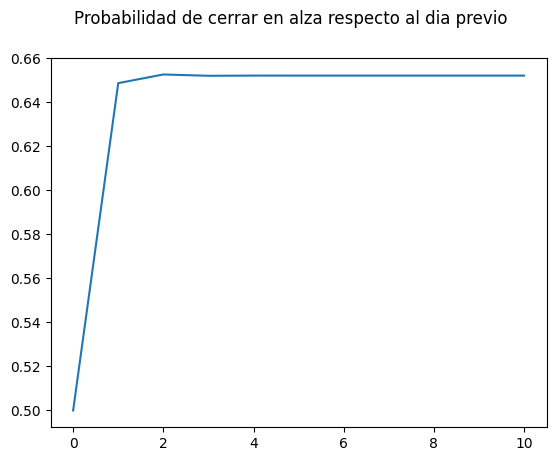

In [2]:
#LIBRERIAS
import numpy as np
import matplotlib.pyplot as plt
import random

#Matriz de transicion
P=np.array([[0.6,0.4],[0.75,0.25]])

#Inicializado pi0
pi0=np.array([0.5,0.5])

#matriz de acumulacion de procesos t=1->t=10
pi=[]
pi.append(pi0)

pmul=P.copy()

#calculo de estaos de probabilidad 
for i in range(10):
    pmul=np.matmul(pmul,P)
    pit=np.matmul(pi0,pmul)
    pi.append(pit)

pi=np.array(pi)
print(pi)


#Graficando la componente 1,2 de pit
#plot pi1t=P(pxt=+1)vst
fig=plt.figure()
fig.suptitle('Probabilidad de cerrar en alza respecto al dia previo')
plt.plot(range(len(pi)),pi[:,0])
plt.show()


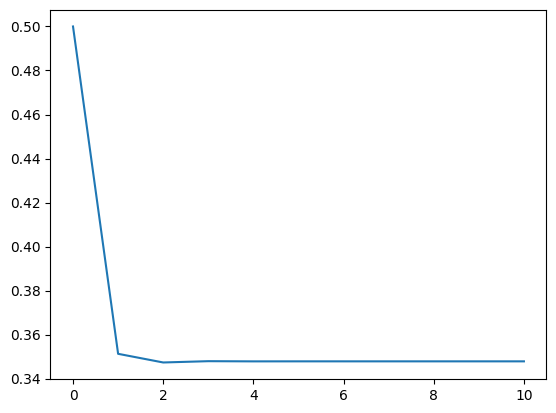

In [3]:
fig.suptitle('Probabilidad de cerrar en baja respecto al dia previo')
plt.plot(range(len(pi)),pi[:,1])
plt.show()

De las graficas anteriores se observa que la matriz de distribucion alcanza un estado estacionario, para el ejemplo, este estado se alcanza en $[0.652,0.347]$.

Se puede considerar que toda distribucion va a tender a un limite en el que deja de tener dependencia temporal, en el ejemplo este limite es cuando:
$$\pi_{t}=\left[ \frac{1-p_{11}}{2-(p_{11}+p_{22})},\frac{1-p_{22}}{2-(p_{11}+p_{22})}  \right]



## Representacion del precio de las acciones de la empresa ACME

Para representar el cambio en los precios de las acciones se tiene que considerar:
1. Existe un rpecio inicial; por ejemplo 100 \$
2. Un conjunto de probabilidad inicial, que en este caso es el mimo que antes.
3. mapear el estado $+1$ de la accion el cual es el incremento del cierre del dia anterior por un numero aleatorio que represetna un porcentaje entre $[0\%,2\%]$
4. mapear el estado $-1$ del mismo modo que el paso anterior.
5. cada paro de tiempo $t$, calcular la probabilidad de la distribucion de acuerdo con $\pi_{0}P^{t}$.
6. Generar una distribucion uniforme en un intervalo $[0,1]$. Si el numero dado es menor o igual que $\pi_{1t}=P(x_{t}=+1)$, incrementar el precio del siguiente paso un porcentaje aleatorio de los dados anteriormente; en caso de no cumplir la primera condicion, se cerrará la accion a la baja.

El codigo que modela el comportamiento es:

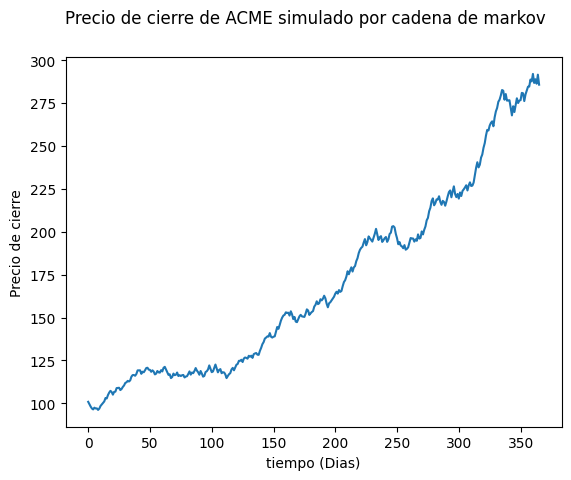

In [4]:
Precio_cierre=100.0

#inicial pi_0
pi_0=np.array([0.5,0.5])

#delta aleatorio en el rango [0,2.0]
delta=random.random()*2

#numero aleatorio en el rango [0.0,1.0]
r=random.random()

#ciclos que incrementan el precio un delta; if
if r<=pi_0[0]:
    Precio_cierre=Precio_cierre*(100+delta)/100
else:   #ciclo que cierra el precio en delta
    Precio_cierre= max(Precio_cierre*(100-delta)/100,1.0)

#acumulativo del nuevo precio de cierre
Precios_cierre=[Precio_cierre]
p_mul=P.copy()
T=365

#repeticion de 365 veces
for i in range(T):
    p_mul=np.matmul(p_mul,P)
    pit=np.matmul(pi_0,p_mul)
    delta=random.random()*2
    r=random.random()
    if r<=pit[0]:
        Precio_cierre=max(Precio_cierre*(100+delta)/100,1.0)
    else:
        Precio_cierre=Precio_cierre*(100-delta)/100
    Precios_cierre.append(Precio_cierre)

fig=plt.figure()
fig.suptitle('Precio de cierre de ACME simulado por cadena de markov')
plt.xlabel('tiempo (Dias)')
plt.ylabel('Precio de cierre')
plt.plot(range(T+1),Precios_cierre)
plt.show()